## Initialization

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rc('figure',figsize=(17,6))
#set_matplotlib_formats('svg')
#plt.rc('figure',figsize=(12,6))

In [2]:
import TumOnc as to
import scipy as sp
import scipy.stats as st
import scipy.optimize as so

## Distribution testing

In [10]:
genes=to.read_genes_default()
bcc=to.clean_mutations(to.read_mutations(),genes)

Read precalculated counts from Agil_RS_names.bed.ctx3counts.pcl
Read precalculated counts from Agil_RS_names.bed.ctx5counts.pcl


In [11]:
bn=to.binned_ns(bcc[bcc.Variant_Type == 'SNP'],genes).bin()

[-1.99967606  1.88184826 -0.42160654] [-1.99967606  1.88184826 -0.42160654]
[-1.57573597  1.58023624 -0.404405  ] [ 0.42394009 -0.30161202  0.01720154]
[-1.55054619  1.57381691 -0.40600355] [ 0.02518978 -0.00641933 -0.00159855]
[-1.55051066  1.57381431 -0.40600531] [  3.55295642e-05  -2.60468624e-06  -1.76895681e-06]
[-1.55051066  1.57381431 -0.40600531] [  5.11980207e-11   1.36029697e-12  -1.56462034e-12]


In [12]:
bd=pd.DataFrame({'n': np.sum(bn.ns,axis=(0,3)).flatten(),
                 'N': bn.N.flatten()*bn.C,
                 'p': bn.pmodel.pmatrix.flatten()})
bd.sort(columns='p',inplace=True)
bd.head()

,N,n,p
451211,3392,0,0.000002
459000,2432,0,0.000002
456256,2496,0,0.000002
453294,4608,0,0.000002
459124,2176,0,0.000002


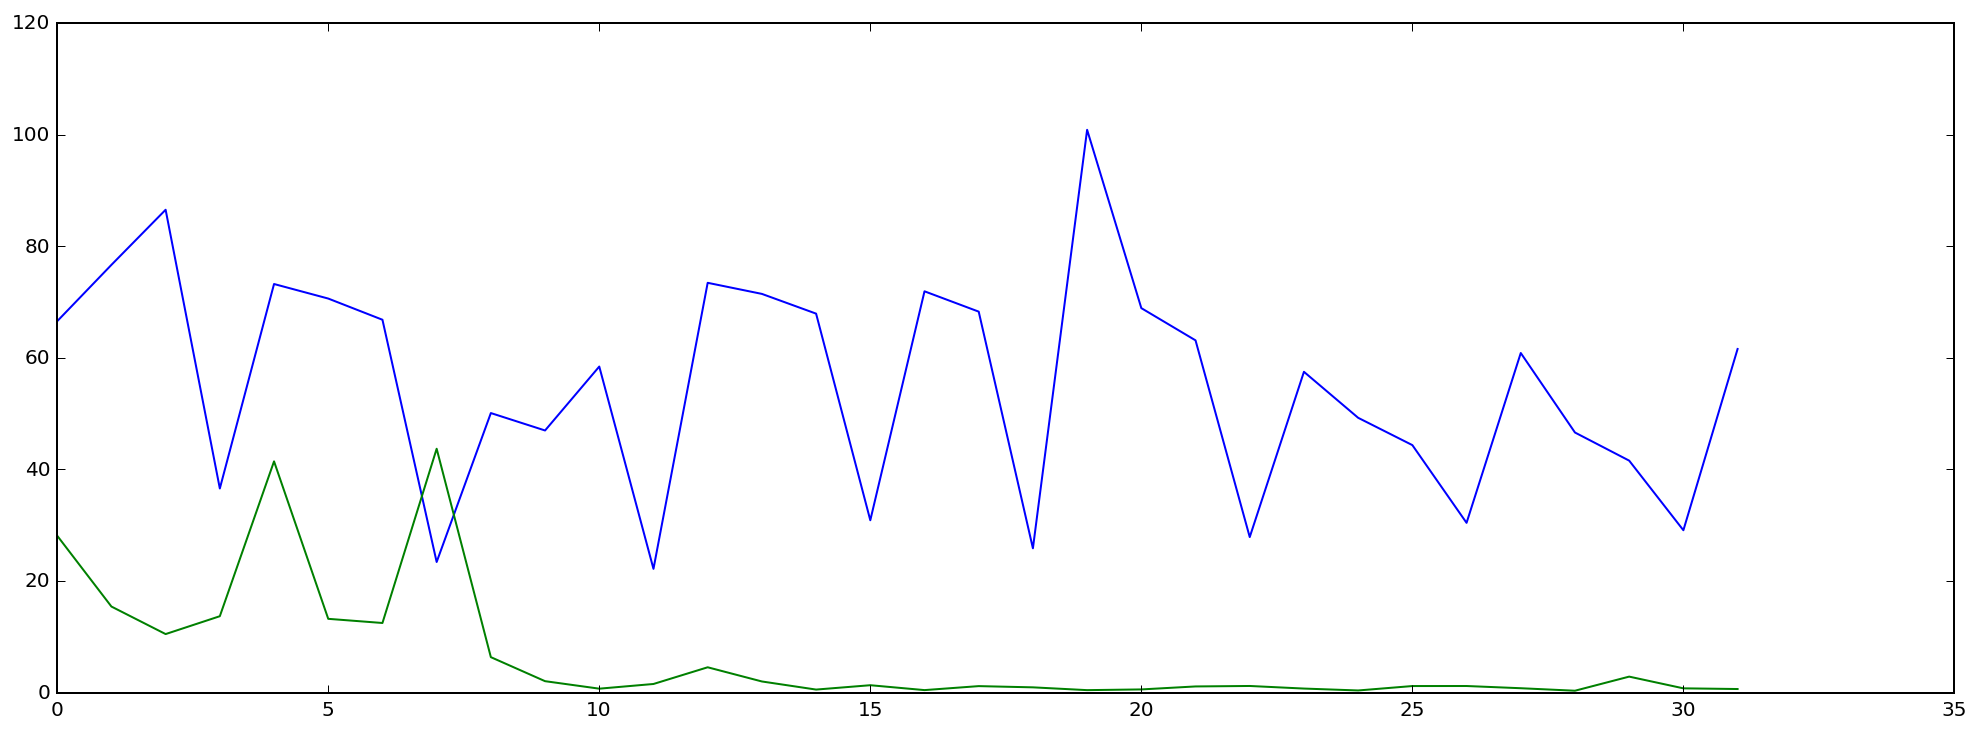

In [45]:
plt.plot(bn.N.mean(axis=1))
plt.plot(bn.ns.sum(axis=(0,2,3))/bn.N.sum(axis=1)/bn.C*100000)

In [74]:
ttt=to.binned_ns(bcc[bcc.Variant_Type == 'SNP'],genes).bin(pmodel=to.pmodel.pmodel4)

In [75]:
tttbd=pd.DataFrame({'n': np.sum(ttt.ns,axis=(0,3)).flatten(),
                 'N': ttt.N.flatten()*ttt.C,
                 'p': ttt.pmodel.pmatrix.flatten()})
tttbd.sort(columns='p',inplace=True)
tttbd.head()

,N,n,p
317833,180736,0,1.576446e-09
461394,55808,0,1.790456e-09
463679,47168,0,2.118215e-09
392472,54976,0,2.190009e-09
464261,45504,0,2.195624e-09


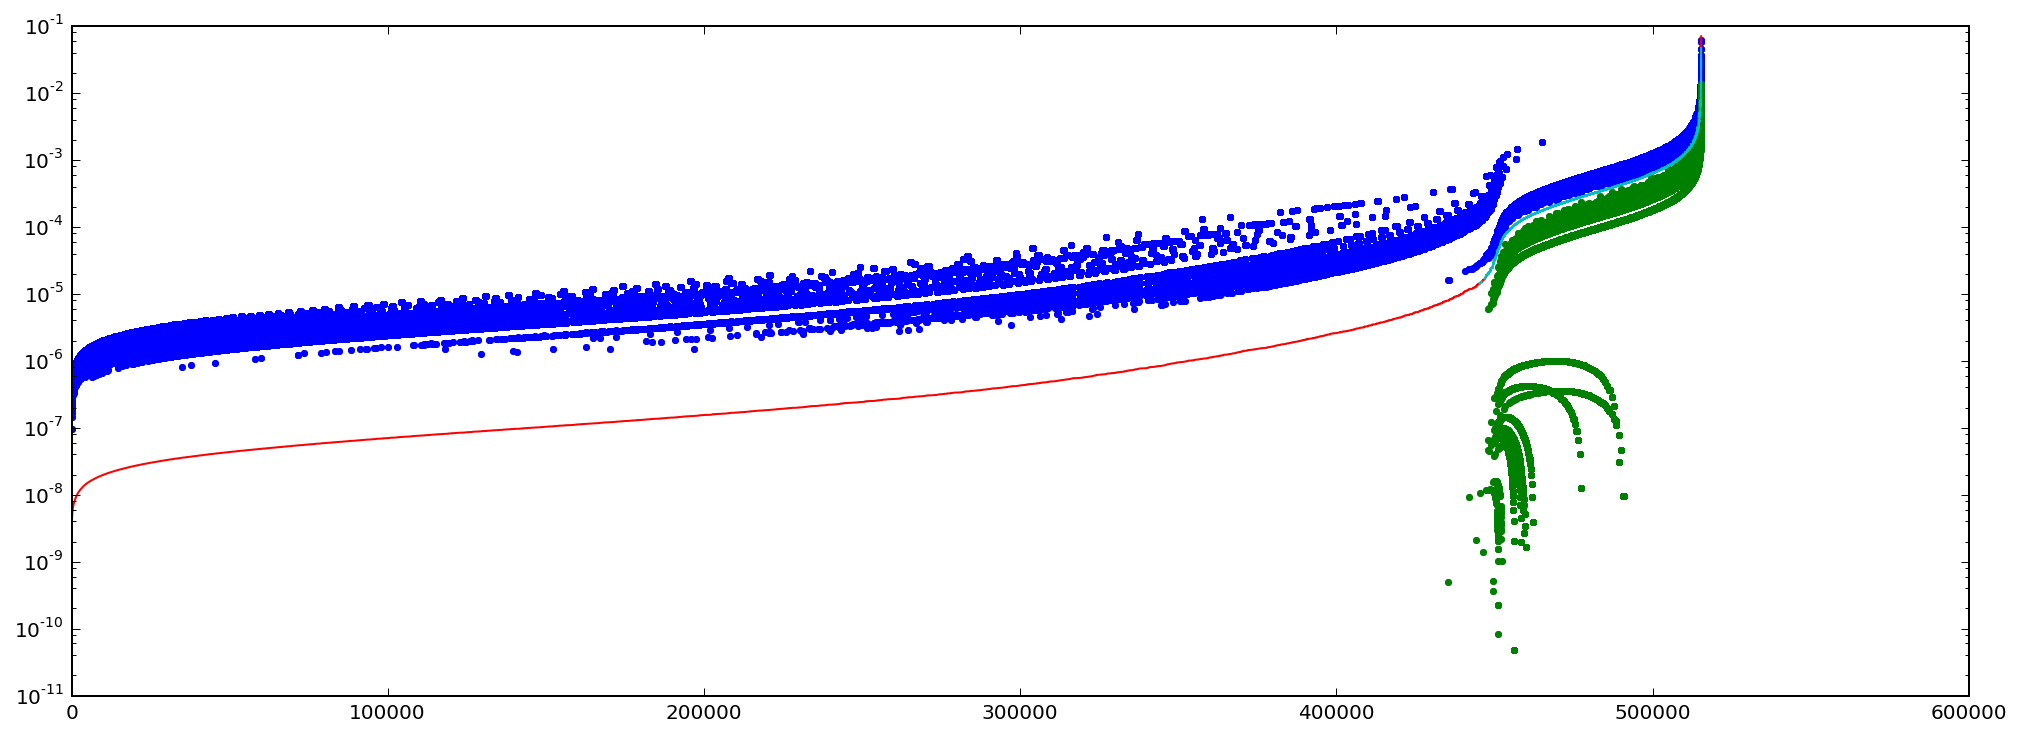

In [76]:
plt.semilogy(tttbd.p+np.sqrt(tttbd.p/tttbd.N),'.')
plt.semilogy(tttbd.p-np.sqrt(tttbd.p/tttbd.N),'.')
plt.semilogy(tttbd.p)
plt.semilogy(tttbd.n/tttbd.N)

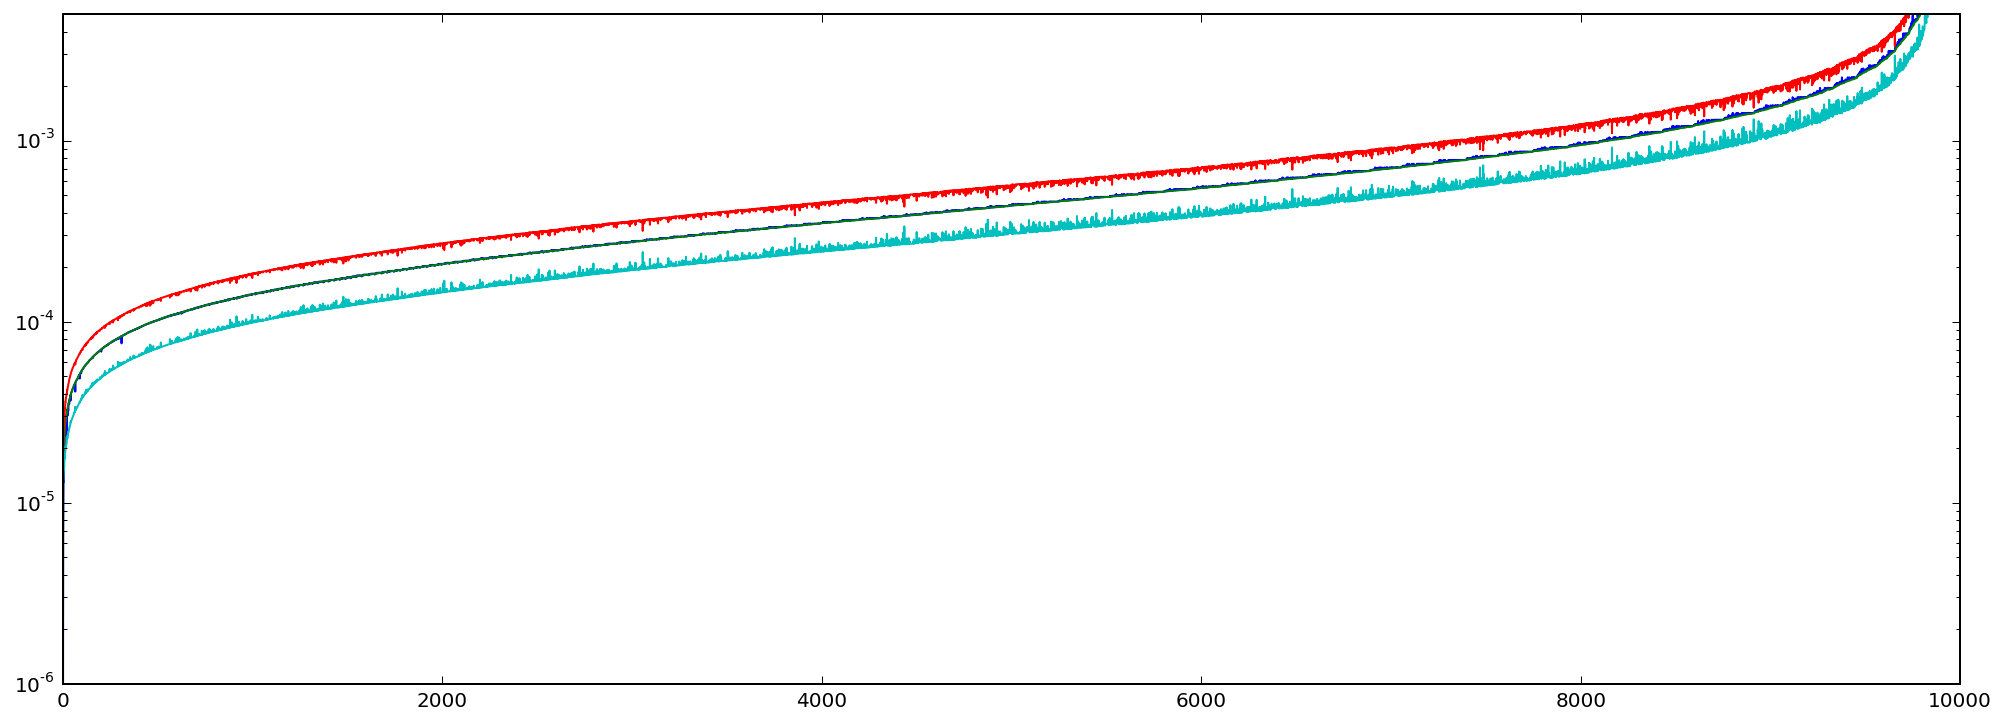

In [79]:
group_stat2(tttbd,10)
tttbdg=tttbd.groupby('gid').agg({'N': np.sum,
                                 'n': np.sum,
                             'p': np.mean})
tttbdg['pp'] = [np.sum(f.p*f.N)/np.sum(f.N)
                for n, f in tttbd.groupby('gid')]
plt.ylim(ymin=1e-6,ymax=5e-3)
plt.semilogy(tttbdg.n/tttbdg.N)
plt.semilogy(tttbdg.pp)
plt.semilogy(tttbdg.pp+np.sqrt(tttbdg.pp/tttbdg.N))
plt.semilogy(tttbdg.pp-np.sqrt(tttbdg.pp/tttbdg.N))

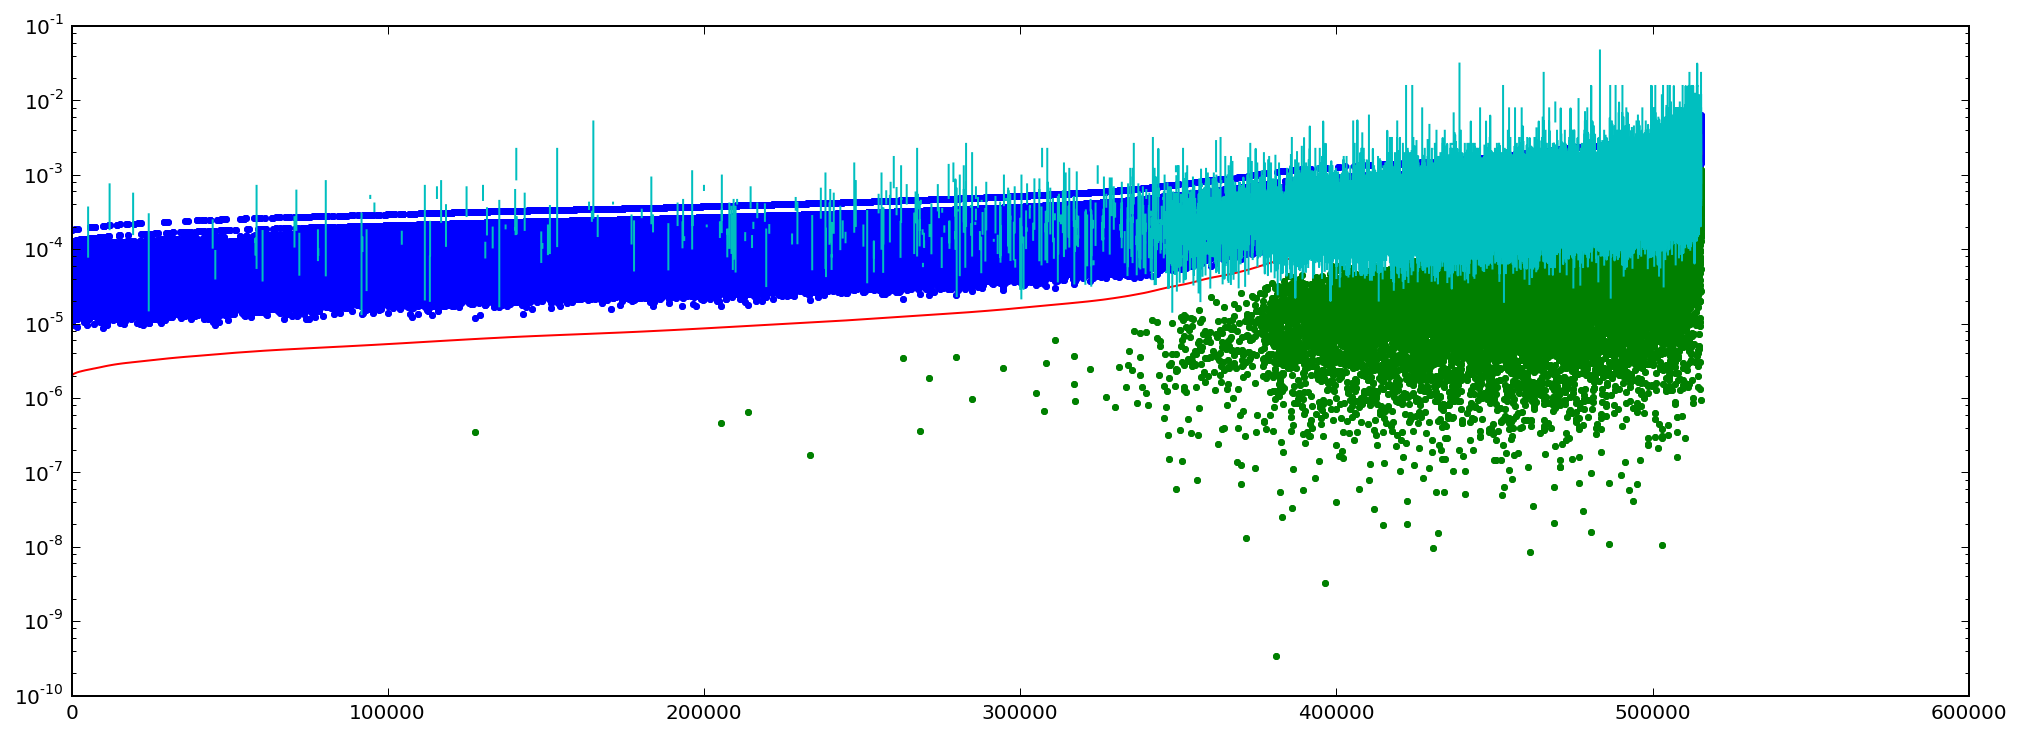

In [13]:
plt.semilogy(bd.p+np.sqrt(bd.p/bd.N),'.')
plt.semilogy(bd.p-np.sqrt(bd.p/bd.N),'.')
plt.semilogy(bd.p)
plt.semilogy(bd.n/bd.N)

In [14]:
def group_stat(t,deltap=0.1):
    gid = 0
    t['gid'] = 0
    sumnp = 0
    for rid,r in t.iterrows():
        t.at[rid,'gid'] = gid
        sumnp += r.p*r.N
        if sumnp > 0 and 1/ma.sqrt(sumnp) <= deltap:
            gid += 1
            sumnp = 0
            
def group_stat2(t,nmin=10):
    gid = 0
    t['gid'] = 0
    sumn = 0
    for rid,r in t.iterrows():
        t.at[rid,'gid'] = gid
        sumn += r.n
        if sumn > nmin:
            gid += 1
            sumn = 0


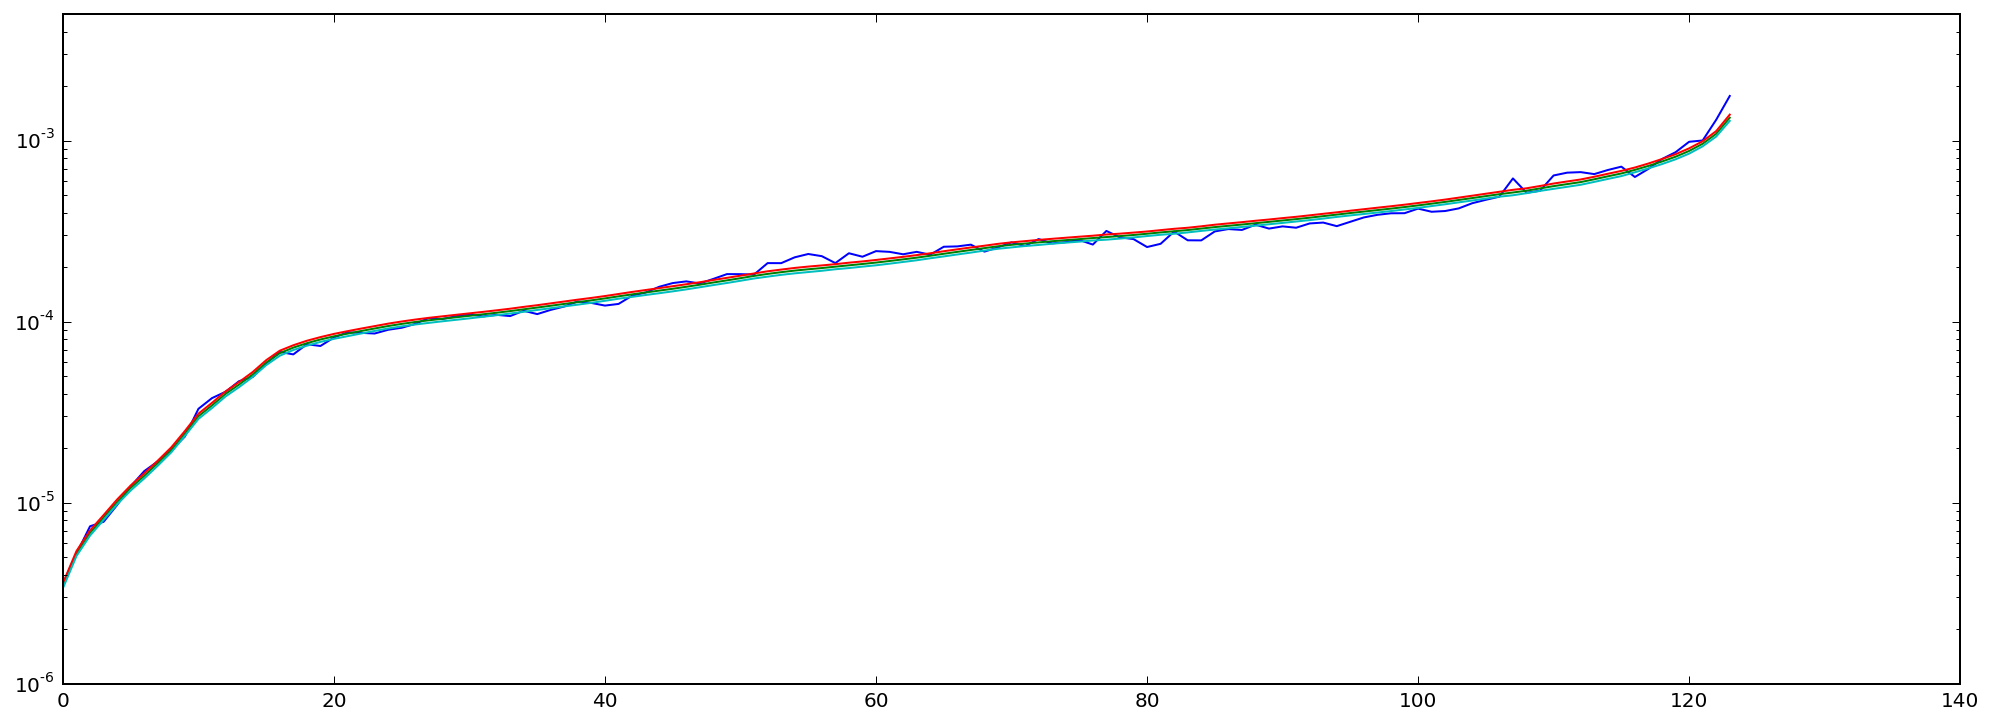

In [15]:
group_stat2(bd,1000)
bdg=bd.groupby('gid').agg({'N': np.sum,
                           'n': np.sum,
                           'p': np.mean})
bdg['pp'] = [np.sum(f.p*f.N)/np.sum(f.N)
             for n, f in bd.groupby('gid')]

plt.ylim(ymin=1e-6,ymax=5e-3)
plt.semilogy(bdg.n/bdg.N)
plt.semilogy(bdg.p)
plt.semilogy(bdg.p+np.sqrt(bdg.p/bdg.N))
plt.semilogy(bdg.p-np.sqrt(bdg.p/bdg.N))

In [16]:
bn2=to.binned_ns(bcc[bcc.Variant_Type == 'SNP'],genes).bin(pmodel=to.pmodel.pmodel2)

In [17]:
bd2=pd.DataFrame({'n': np.sum(bn2.ns,axis=(0,3)).flatten(),
                 'N': bn2.N.flatten()*bn.C,
                 'p': bn2.pmodel.pmatrix.flatten()})
bd2.sort(columns='p',inplace=True)
bd2.head()

,N,n,p
450912,3200,0,0.000003
461641,3840,0,0.000003
461642,5248,0,0.000003
461643,1152,0,0.000003
461644,3840,0,0.000003


In [18]:
bd2g=pd.DataFrame({'n': np.sum(bn2.ns,axis=(0,1,3)),
                   'N': np.sum(bn2.N,axis=0)*bn.C,
                   'pn': np.sum(bn2.pmodel.pmatrix*bn2.N*bn.C, axis=0),
                   'gene': pd.Series(bn.bin_gene).order().index})
bd2g.sort(columns='pn',inplace=True)
bd2g.head()

,N,gene,n,pn
15356,2560,ENTPD3,3,0.103445
14143,2496,WFDC6,0,0.137209
6388,2496,SLC26A1,8,0.180381
14288,2368,ENTPD1,8,0.190103
5739,2496,C10orf25,3,0.194458


In [19]:
bdg=pd.DataFrame({'n': np.sum(bn.ns,axis=(0,1,3)),
                   'N': np.sum(bn.N,axis=0)*bn.C,
                   'pn': np.sum(bn.pmodel.pmatrix*bn.N*bn.C, axis=0),
                   'gene': pd.Series(bn.bin_gene).order().index})
bdg.sort(columns='pn',inplace=True)
bdg.head()

,N,gene,n,pn
14143,2496,WFDC6,0,0.111876
15356,2560,ENTPD3,3,0.120319
6388,2496,SLC26A1,8,0.130203
2487,4992,RPL41,0,0.178816
447,3456,PECAM1,0,0.181889


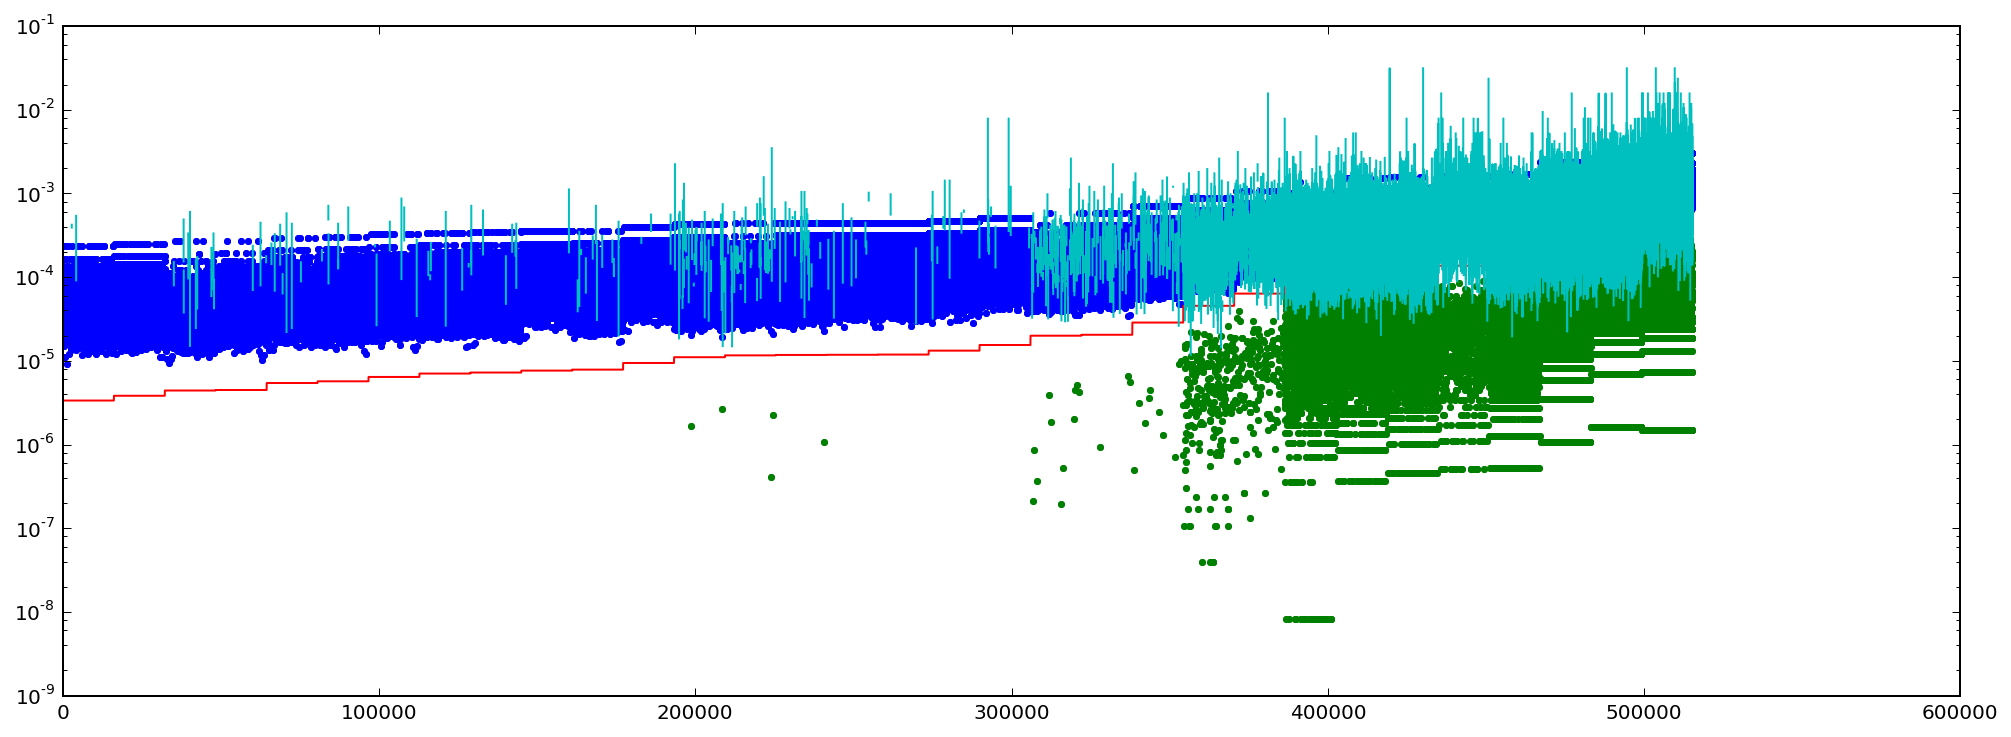

In [20]:
plt.semilogy(bd2.p+np.sqrt(bd2.p/bd2.N),'.')
plt.semilogy(bd2.p-np.sqrt(bd2.p/bd2.N),'.')
plt.semilogy(bd2.p)
plt.semilogy(bd2.n/bd2.N)

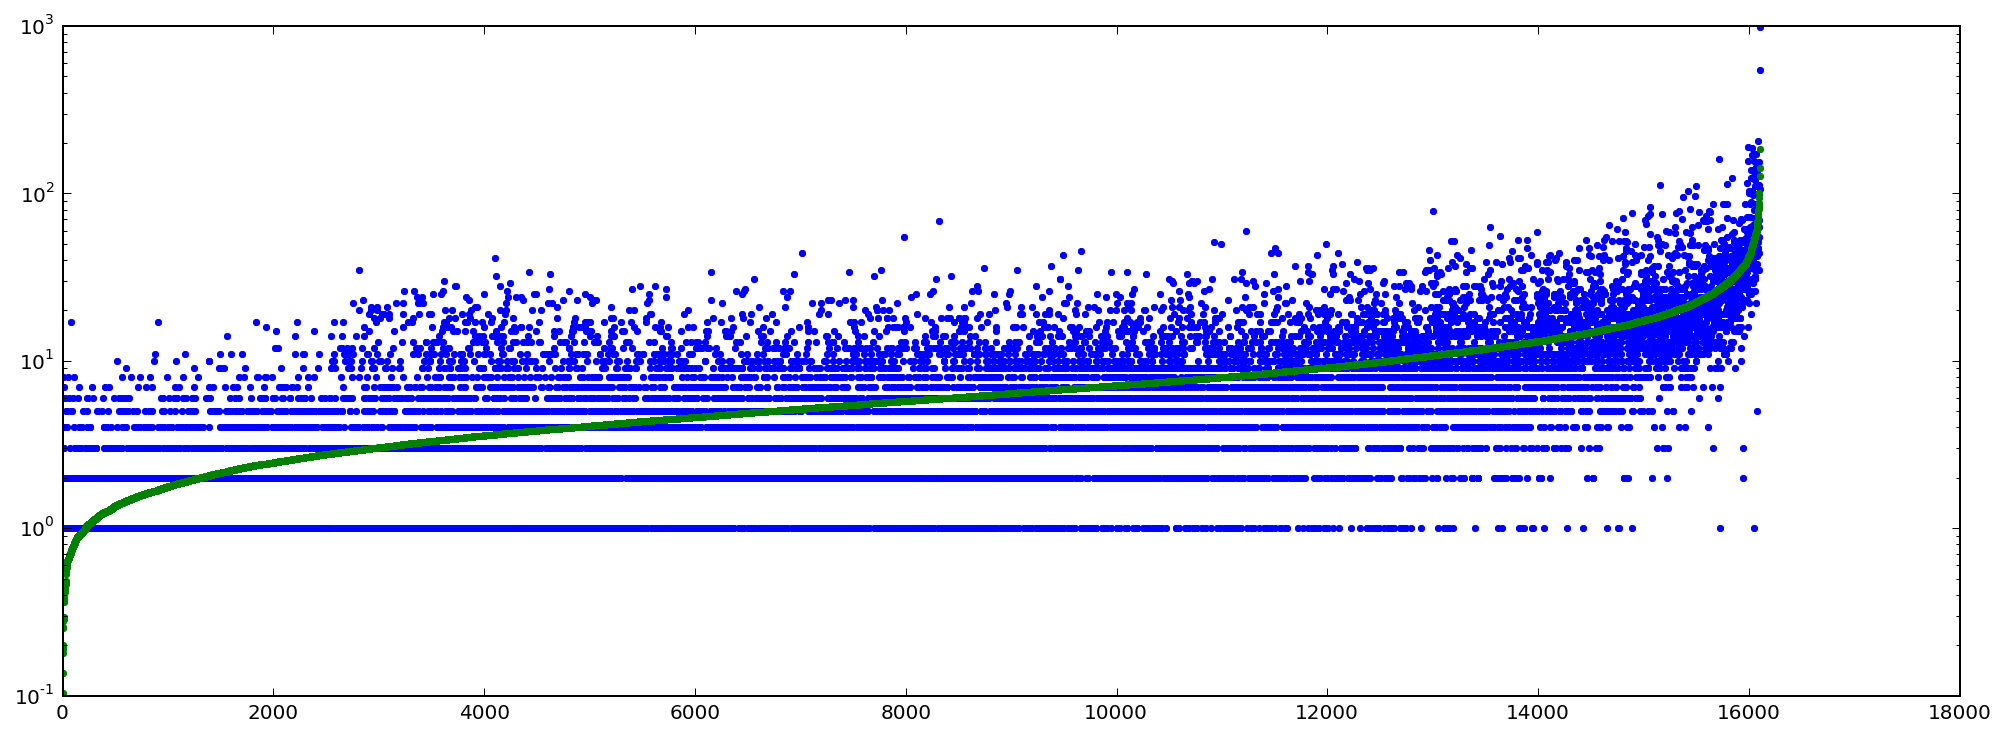

In [21]:
plt.semilogy(bd2g.n,'.')
plt.semilogy(bd2g.pn,'.')

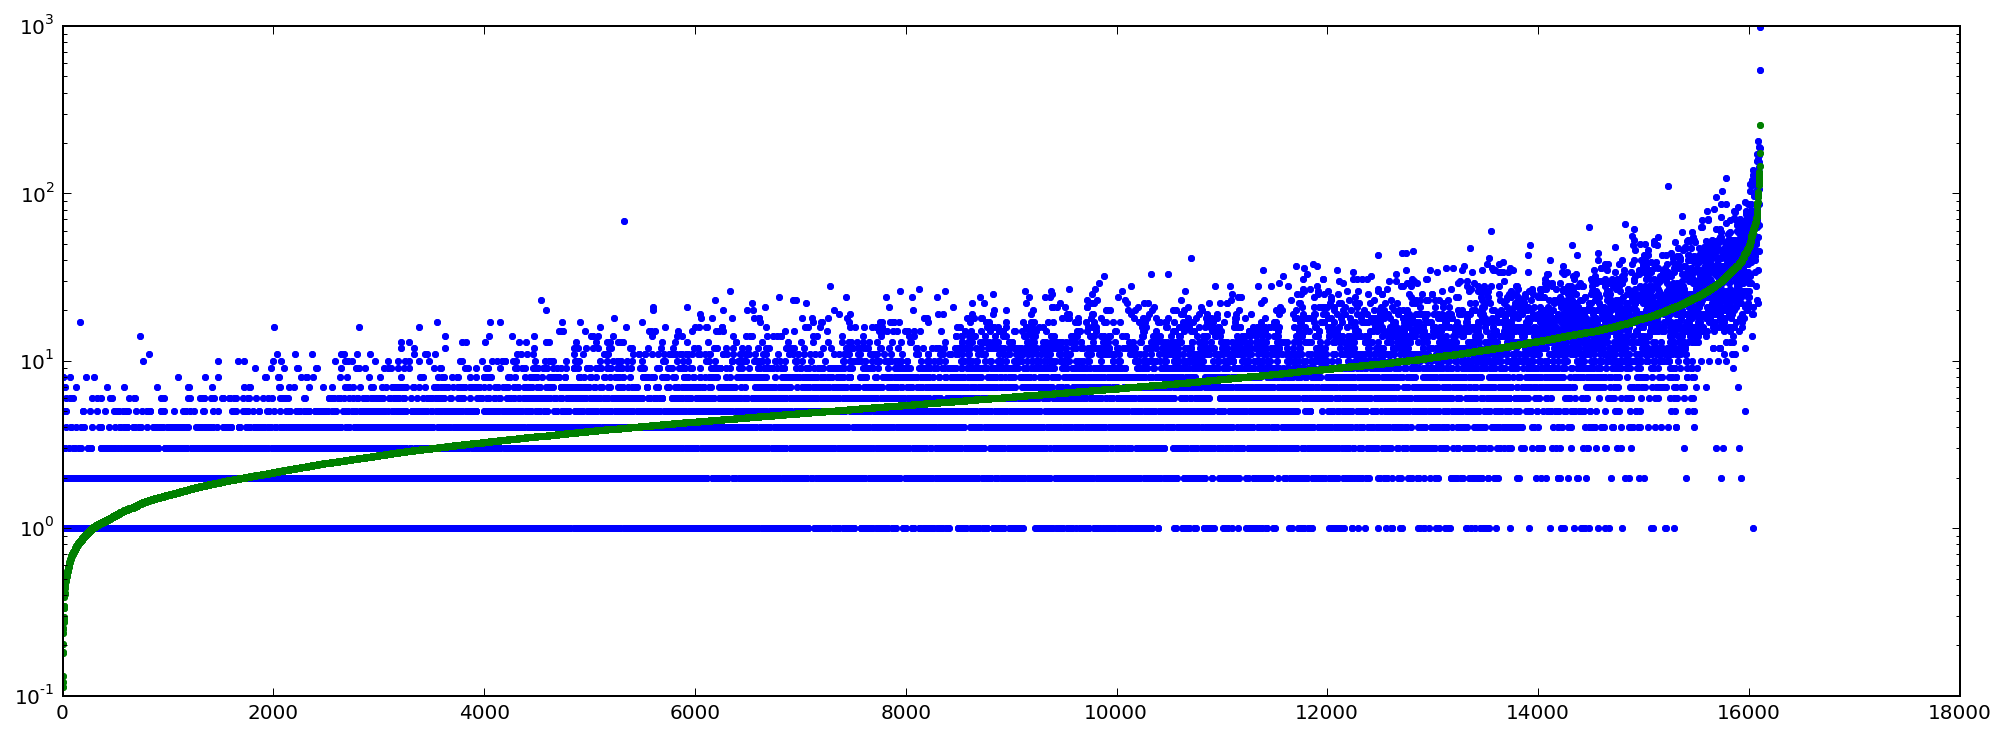

In [22]:
plt.semilogy(bdg.n,'.')
plt.semilogy(bdg.pn,'.')

In [23]:
bdg.tail(20)

,N,gene,n,pn
12927,784512,XIRP2,156,96.606169
13201,948224,FAT4,110,96.973294
7670,934080,RYR3,137,98.258336
5976,1508480,NEB,101,99.666617
4428,1230336,PCDHA8,55,100.010982
6690,1210944,GPR98,206,100.708532
212,1317056,FSIP2,22,101.735315
11372,1606976,OBSCN,106,111.614816
14115,992704,USH2A,143,113.737006
12543,953856,RYR2,173,117.200429


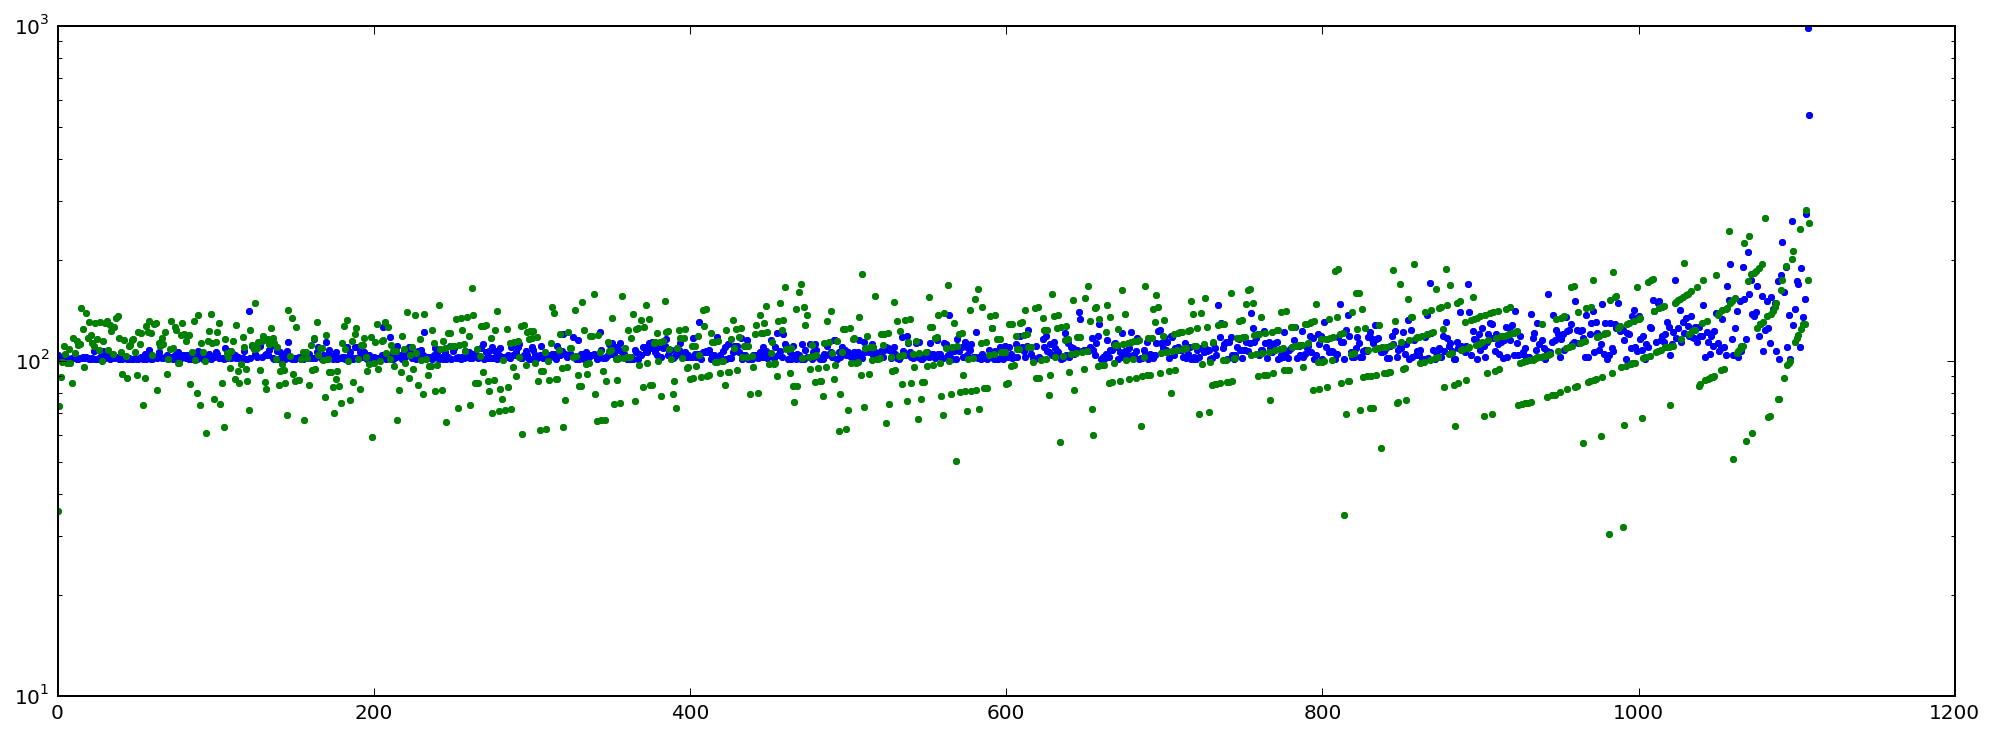

In [24]:
group_stat2(bdg,100)
bdgg=bdg.groupby('gid').agg({'N': np.sum,
                             'n': np.sum,
                             'pn': np.sum})
bdgg['pp'] = [np.sum(f.pn*f.N)/np.sum(f.N)
               for n, f in bdg.groupby('gid')]
plt.semilogy(bdgg.n,'.')
plt.semilogy(bdgg.pn,'.')

In [25]:
bdg['rat']=(bdg.n-bdg.pn)/np.sqrt(bdg.pn)
bdg[bdg.pn>10].sort('rat').tail(100)

,N,gene,n,pn,gid,rat
5076,143488,SLCO1C1,29,10.037005,569,5.985561
9930,230592,NLRP5,52,23.171609,907,5.988834
15938,369472,MYH7,53,23.682537,913,6.024379
12927,784512,XIRP2,156,96.606169,1093,6.042810
14527,324672,COL4A4,69,33.683680,1002,6.085071
1488,323136,SCN7A,61,28.397667,964,6.117970
14769,177728,GRM8,52,22.699018,901,6.150050
524,549184,FBN1,67,32.063531,991,6.169832
8294,255936,NPC1L1,37,13.949824,723,6.171488
11812,230208,DENND3,34,12.220213,664,6.230376


In [26]:
bd2g['rat']=(bd2g.n-bd2g.pn)/np.sqrt(bd2g.pn)
bd2g[bd2g.pn>10].sort('rat').tail(50)

,N,gene,n,pn,rat
1337,460352,SPTA1,87,29.014584,10.764915
8824,177088,GRIA2,46,10.711189,10.782468
15811,279360,DCHS2,70,20.604269,10.882052
15907,347456,PAPPA2,79,24.640161,10.951066
7490,386496,DSCAM,86,27.949989,10.980231
14115,992704,USH2A,143,58.402212,11.069917
5912,231744,CFH,53,12.817042,11.224009
1488,323136,SCN7A,61,15.970977,11.267479
7489,417280,UNC13C,77,22.897032,11.306586
5306,208320,PLCL1,53,12.572686,11.401470


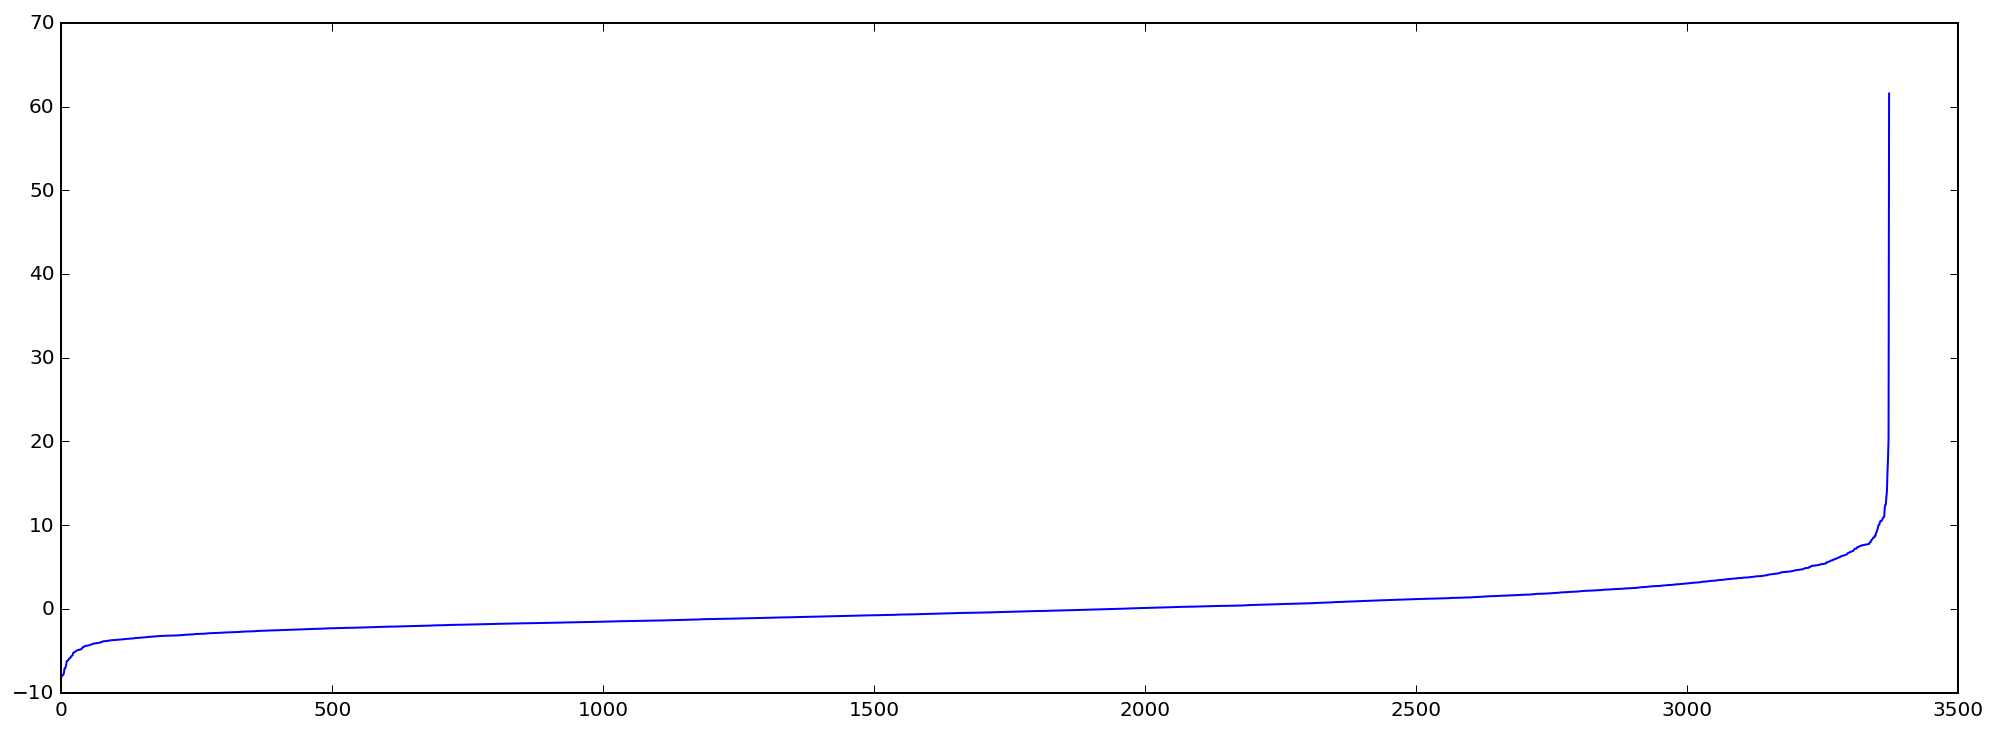

In [27]:
plt.plot(bdg[bdg.pn>10].sort('rat')['rat'])

In [28]:
group_stat2(bd2,1000)
bdg2=bd2.groupby('gid').agg({'N': np.sum,
                             'n': np.sum,
                             'p': np.mean})
bdg2['pp'] = [np.sum(f.p*f.N)/np.sum(f.N)
              for n, f in bd2.groupby('gid')]

In [62]:
group_stat2(tttbd,100)
tttbdg=tttbd.groupby('gid').agg({'N': np.sum,
                                 'n': np.sum,
                             'p': np.mean})
tttbdg['pp'] = [np.sum(f.p*f.N)/np.sum(f.N)
                for n, f in tttbd.groupby('gid')]
plt.ylim(ymin=1e-6,ymax=5e-3)
plt.semilogy(tttbdg.n/tttbdg.N)
plt.semilogy(tttbdg.pp)
plt.semilogy(tttbdg.pp+np.sqrt(tttbdg.pp/tttbdg.N))
plt.semilogy(tttbdg.pp-np.sqrt(tttbdg.pp/tttbdg.N))

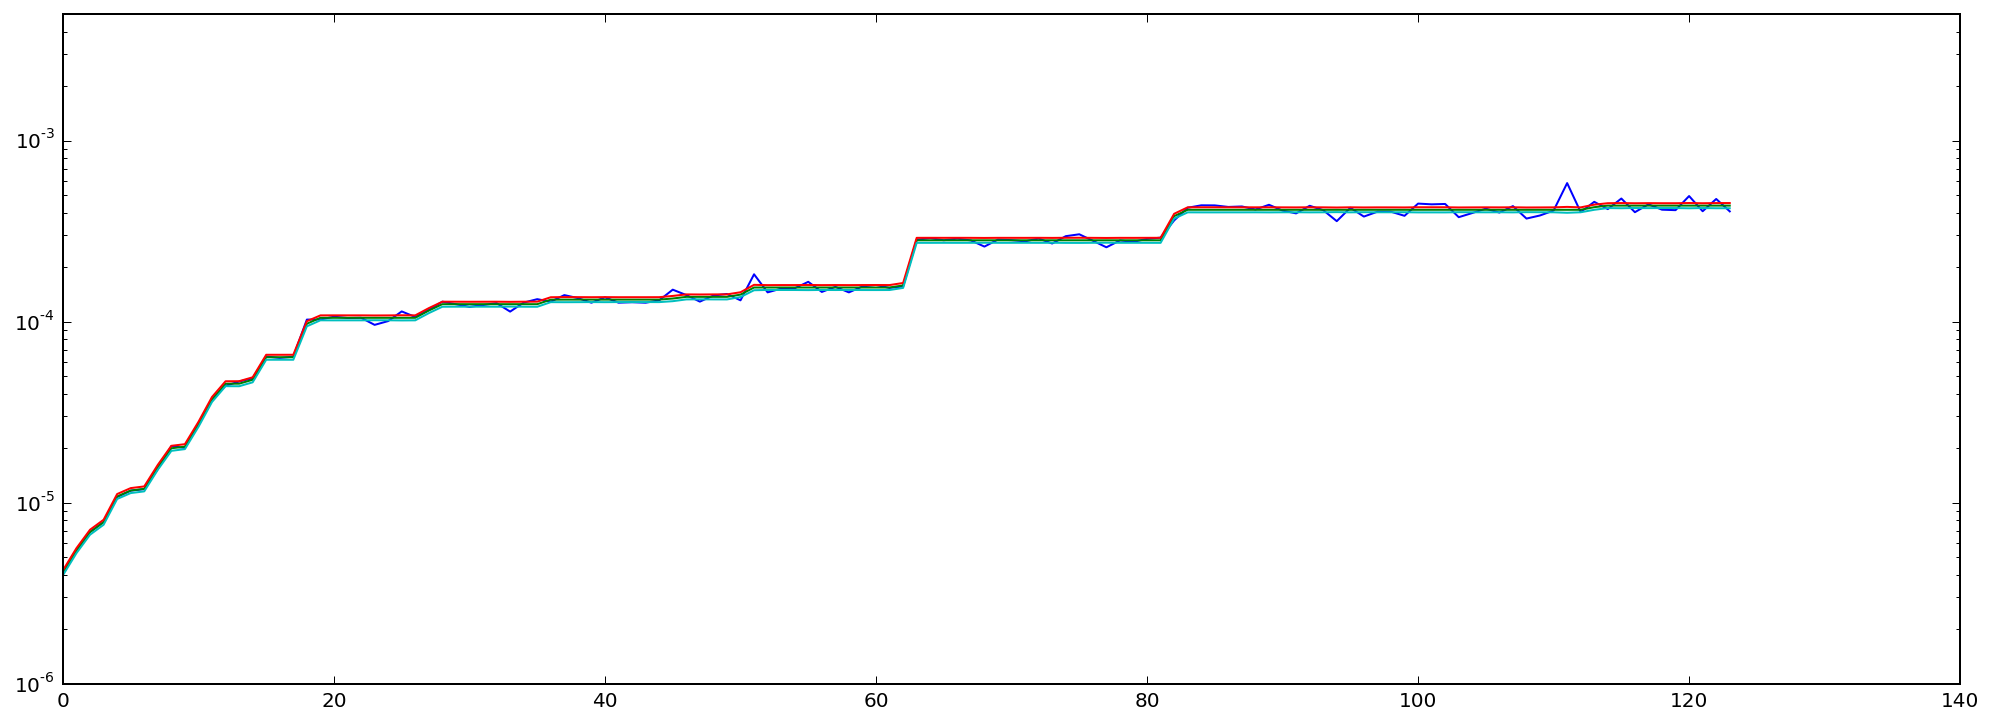

In [29]:
plt.ylim(ymin=1e-6,ymax=5e-3)
plt.semilogy(bdg2.n/bdg2.N)
plt.semilogy(bdg2.pp)
plt.semilogy(bdg2.pp+np.sqrt(bdg2.pp/bdg2.N))
plt.semilogy(bdg2.pp-np.sqrt(bdg2.pp/bdg2.N))

In [30]:
st.chisquare(bdg2.n, bdg2.pp*bdg2.N,
             ddof=len(bn2.pmodel.f3)-1)

(433.78020591043571, 9.1020391210076083e-46)

In [31]:
st.chisquare(bdg.n, bdg.pp*bdg.N,
             ddof=len(bn.pmodel.f3)+2)

AttributeError: 'DataFrame' object has no attribute 'pp'

In [ ]:
plt.lplotnp.sum(bn2.pmodel.N*bn2.pmodel.pmatrix*bn2.C,axis=0)
np.sum(bn2.pmodel.ns,axis=(0,1,3))

In [ ]:
allc5=to.context.get_ctx_bins(bcc[bcc.Variant_Type == 'SNP'])
allc5.head()

In [ ]:
bn3=to.binned_ns(bcc[bcc.Variant_Type == 'SNP'],genes).bin(allc5.c5id_15.to_dict())

In [ ]:
bd3=pd.DataFrame({'n': np.sum(bn3.ns,axis=(0,3)).flatten(),
                 'N': bn3.N.flatten()*bn.C,
                 'p': bn3.pmodel.pmatrix.flatten()})
bd3.sort(columns='p',inplace=True)
bd3.head()

In [ ]:
plt.semilogy(bd3.p+np.sqrt(bd3.p/bd3.N),'.')
plt.semilogy(bd3.p-np.sqrt(bd3.p/bd3.N),'.')
plt.semilogy(bd3.p)
plt.semilogy(bd3.n/bd3.N)

In [ ]:
group_stat(bd3,0.05)
bdg3=bd3.groupby('gid').agg({'N': np.sum,
                             'n': np.sum,
                             'p': np.mean})
bdg3['pp'] = [np.sum(f.p*f.N)/np.sum(f.N)
              for n, f in bd3.groupby('gid')]
plt.ylim(ymin=1e-6,ymax=5e-3)
plt.semilogy(bdg3.n/bdg3.N)
plt.semilogy(bdg3.pp)
plt.semilogy(bdg3.p+np.sqrt(bdg3.p/bdg3.N))
plt.semilogy(bdg3.p-np.sqrt(bdg3.p/bdg3.N))

In [ ]:
st.chisquare(bdg3.n, bdg3.pp*bdg3.N,
             ddof=len(bn3.pmodel.f3)+3)

In [ ]:
group_stat2(bd3,2000)
bdg32=bd3.groupby('gid').agg({'N': np.sum,
                              'n': np.sum,
                              'p': np.mean})
bdg32['pp'] = [np.sum(f.p*f.N)/np.sum(f.N)
               for n, f in bd3.groupby('gid')]
plt.ylim(ymin=1e-6,ymax=5e-3)
plt.semilogy(bdg32.n/bdg32.N)
plt.semilogy(bdg32.pp)
plt.semilogy(bdg32.p+np.sqrt(bdg32.p/bdg32.N))
plt.semilogy(bdg32.p-np.sqrt(bdg32.p/bdg32.N))

In [ ]:
st.chisquare(bdg32.n, bdg32.pp*bdg32.N,
             ddof=(len(bn3.pmodel.f3)+2))

In [ ]:
st.chisquare(np.histogram(np.random.random_sample(10000),bins=100)[0])

In [ ]:
bn3p=to.binned_ns(bcc[bcc.Variant_Type == 'SNP'],genes).bin(pmodel=to.pmodel.pmodel3prime)
bd3p=pd.DataFrame({'n': np.sum(bn3p.ns,axis=(0,3)).flatten(),
                 'N': bn3p.N.flatten()*bn.C,
                 'p': bn3p.pmodel.pmatrix.flatten()})
bd3p.sort(columns='p',inplace=True)
print(bd3p.head())

group_stat2(bd3p,1000)
bdg3p=bd3p.groupby('gid').agg({'N': np.sum,
                              'n': np.sum,
                              'p': np.mean})
bdg3p['pp'] = [np.sum(f.p*f.N)/np.sum(f.N)
               for n, f in bd3p.groupby('gid')]
plt.ylim(ymin=1e-6,ymax=5e-3)
plt.semilogy(bdg3p.n/bdg3p.N)
plt.semilogy(bdg3p.pp)
plt.semilogy(bdg3p.p+np.sqrt(bdg3p.p/bdg3p.N))
plt.semilogy(bdg3p.p-np.sqrt(bdg3p.p/bdg3p.N))

st.chisquare(bdg3p.n, bdg3p.pp*bdg3p.N,
             ddof=(len(bn3p.pmodel.f3)+2))

In [ ]:
plt.plot(bn.pmodel.f3*ma.exp(sum(bn.pmodel.a[i]*np.mean(bn.pmodel.V[i]) for i in range(3))))
plt.plot(bn2.pmodel.f3)
plt.plot(bn2.N.sum(axis=(1))/bn2.N.sum())
plt.plot(bn2.pmodel.f3*bn2.N.sum(axis=(1))/bn2.N.sum())
plt.yscale('log')
plt.grid()

In [ ]:
bn2.pmodel.f3*bn2.pmodel.N.sum(axis=1)*bn2.C

In [ ]:
to.context.id_ctx3

In [ ]:
ee=np.exp(sum(bn.pmodel.a[i]*bn.pmodel.V[i] for i in range(3)))

In [ ]:
max(ee)

In [ ]:
min(ee)

In [ ]:
plt.plot(sorted(ee))
plt.yscale('log')

In [ ]:
ns=bn.pmodel.ns
N=bn.pmodel.N
V=bn.pmodel.V
C=bn.C

In [ ]:
plt.hist(np.log10(ns.sum(axis=(0,1,3))+0.1))

In [ ]:
plt.hist(np.log10(ns.sum(axis=(0,1,3))/N.sum(axis=0)/C+1e-6))

In [ ]:
plt.semilogy(V[0], ns.sum(axis=(0,1,3))/N.sum(axis=0)/C, '.')

In [ ]:
vi=0
nn=ns.sum(axis=(0,1,3))
cut=0
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=5
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=10
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=20
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')

In [ ]:
vi=1
nn=ns.sum(axis=(0,1,3))
cut=0
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=5
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=10
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=20
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')

In [ ]:
vi=2
nn=ns.sum(axis=(0,1,3))
cut=0
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=5
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=10
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')
cut=20
plt.semilogy(V[vi][nn>cut],nn[nn>cut]/N.sum(axis=0)[nn>cut]/C,'.')

In [ ]:
(bn.Vhic<0)&(bn.Vhic>-0.5)

In [ ]:
plt.plot(bn.ns.sum((0,2,3))/bn.N.sum(1)/bn.C,label='all')
pa = -2
for a in -1,-0.5,0,0.5,1:
    r1 = (bn.Vhic>pa)&(bn.Vhic<=a)
    plt.plot(bn.ns.sum((0,3))[:,r1].sum(1)/bn.N[:,r1].sum(1)/bn.C,label=str(pa)+'<Vhic<='+str(a))
    pa = a
plt.legend()

In [ ]:
plt.boxplot((bn.ns.sum((0,3))/bn.N/bn.C).transpose());

In [ ]:
plt.rc('figure',figsize=(17,10))

In [ ]:
plt.errorbar(range(32),bn.ns.sum((0,2,3))/bn.N.sum(1)/bn.C,yerr=np.sqrt(bn.ns.sum((0,2,3)))/bn.N.sum(1)/bn.C,label='all')
pa = -2
for a in -0.5,0,0.5,1:
    r1 = (bn.Vhic>pa)&(bn.Vhic<=a)
    plt.errorbar(range(32),
                 bn.ns.sum((0,3))[:,r1].sum(1)/bn.N[:,r1].sum(1)/bn.C,
                 np.sqrt(bn.ns.sum((0,3))[:,r1].sum(1))/bn.N[:,r1].sum(1)/bn.C,
                 label=str(pa)+'<Vhic<='+str(a))
    pa = a
plt.legend()
plt.ylim(1e-6,1e-3)
plt.yscale('log')

In [ ]:
st.poisson?